Epoch 0: Loss 0.49018875203890583
Epoch 100: Loss 0.23533360215803445
Epoch 200: Loss 0.22100584615523783
Epoch 300: Loss 0.2083402621664764
Epoch 400: Loss 0.19257566361055173
Epoch 500: Loss 0.17645583146995708
Epoch 600: Loss 0.16313759902063746
Epoch 700: Loss 0.153042822156231
Epoch 800: Loss 0.14503883406486162
Epoch 900: Loss 0.13727825015249773
Epoch 1000: Loss 0.12583313724965198
Epoch 1100: Loss 0.09608446251224576
Epoch 1200: Loss 0.040501553999278066
Epoch 1300: Loss 0.00992825705797968
Epoch 1400: Loss 0.0015766506883117303
Epoch 1500: Loss 0.0002006078453632298
Epoch 1600: Loss 2.339450746449386e-05
Epoch 1700: Loss 2.645413012735146e-06
Epoch 1800: Loss 2.9601735890868315e-07
Epoch 1900: Loss 3.3007353278039567e-08
Epoch 2000: Loss 3.6761444805761944e-09
Epoch 2100: Loss 4.09264064640537e-10
Epoch 2200: Loss 4.555726535211241e-11
Epoch 2300: Loss 5.070988898813758e-12
Epoch 2400: Loss 5.644446053214734e-13
Epoch 2500: Loss 6.282722479813285e-14
Epoch 2600: Loss 6.9931640

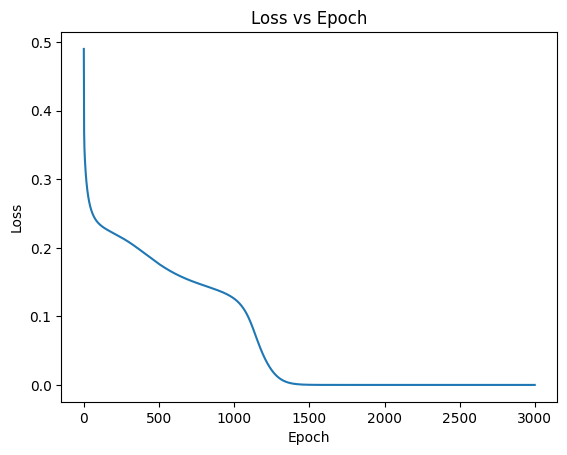

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación sigmoidal
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función de activación sigmoidal
def sigmoid_derivative(x):
    return x * (1 - x)

# Función de pérdida: Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Algoritmo de descenso de gradiente estocástico (SGD)
def sgd(weights, biases, inputs, targets, learning_rate):
    # Forward pass
    layer1_outputs = sigmoid(np.dot(inputs, weights[0]) + biases[0])
    output = np.dot(layer1_outputs, weights[1]) + biases[1]

    # Backpropagation
    output_error = targets - output
    output_delta = output_error
    layer1_error = output_delta.dot(weights[1].T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1_outputs)

    # Actualización de pesos y sesgos
    weights[1] += layer1_outputs.T.dot(output_delta) * learning_rate
    weights[0] += inputs.T.dot(layer1_delta) * learning_rate
    biases[1] += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    biases[0] += np.sum(layer1_delta, axis=0, keepdims=True) * learning_rate

    return weights, biases

# Función de umbral para obtener predicciones binarias
def threshold(predictions):
    return (predictions > 0.5).astype(int)

# Datos de entrada y salida (dummy data)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Inicialización de pesos y sesgos de forma aleatoria
input_dim = X_train.shape[1]
hidden_dim = 2
output_dim = 1

np.random.seed(1)
weights = [np.random.randn(input_dim, hidden_dim), np.random.randn(hidden_dim, output_dim)]
biases = [np.zeros((1, hidden_dim)), np.zeros((1, output_dim))]

# Hiperparámetros
learning_rate = 0.1
epochs = 3000  # Aumentamos el número de épocas

# Entrenamiento de la red neuronal
losses = []
for epoch in range(epochs):
    # Entrenamiento de un lote a la vez (estocástico)
    for i in range(len(X_train)):
        inputs = X_train[i:i+1]
        targets = y_train[i:i+1]
        weights, biases = sgd(weights, biases, inputs, targets, learning_rate)

    # Calcular la pérdida para esta época
    layer1_outputs = sigmoid(np.dot(X_train, weights[0]) + biases[0])
    predictions = np.dot(layer1_outputs, weights[1]) + biases[1]
    loss = mse_loss(y_train, predictions)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss {loss}")

# Predicción final
layer1_outputs = sigmoid(np.dot(X_train, weights[0]) + biases[0])
final_predictions = np.dot(layer1_outputs, weights[1]) + biases[1]
final_predictions_binary = threshold(final_predictions)
print("Final Predictions (Continuous):", final_predictions)
print("Final Predictions (Binary):", final_predictions_binary)

# Graficar la pérdida en función de la época
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()



